In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#from google.colab import drive
#drive.mount('/content/drive')

In [23]:
#data = pd.read_csv("/content/drive/My Drive/train.csv", low_memory = False)
data = pd.read_csv("/Users/snehakarki/Downloads/archive (3)/train.csv", low_memory = False)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [25]:
data.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1330,0x1dcc,CUS_0xf95,March,Alexei Anishchukz,17,082-42-3634,Entrepreneur,15604.56,1389.380000,9,...,Bad,2686.18,27.398116,19 Years and 6 Months,Yes,37.912350,56.03908859527067,Low_spent_Large_value_payments,314.98656126202343,Poor
52411,0x14919,CUS_0x4496,April,Granth,43,091-74-3731,Entrepreneur,68488.88,5692.406667,9,...,_,1356.05,36.483882,15 Years and 2 Months,NM,211.301358,334.1924461013417,Low_spent_Small_value_payments,313.74686239043916,Poor
13902,0x6774,CUS_0x16b1,July,NaN,36,019-80-0066,Writer,67412.2,5911.683333,6,...,Standard,858.85,40.267631,28 Years and 8 Months,Yes,106.592934,359.2283125909259,Low_spent_Large_value_payments,395.34708655318167,Standard
3937,0x2d13,CUS_0x122c,February,NaN,47,883-73-9594,Entrepreneur,36346.13,3188.844167,8,...,Good,1252.46,27.023769,21 Years and 8 Months,No,89.061554,66.00496805879285,High_spent_Large_value_payments,403.81789456574853,Good
92179,0x2321d,CUS_0x84a6,April,Alexp,22,048-49-2969,Mechanic,22157.27,1834.439167,6,...,Standard,1345.58,38.221234,12 Years and 2 Months,Yes,64.041025,154.48494603945144,Low_spent_Small_value_payments,254.91794548847776,Standard
61562,0x17eb8,CUS_0x3f83,March,NaN,26,485-35-2240,Media_Manager,36585.12,NaN,7,...,Standard,1398.09,29.817246,30 Years and 3 Months,Yes,21.564536,144.6110603061816,High_spent_Small_value_payments,379.2004035987686,Standard
52592,0x14a2a,CUS_0x5f55,January,NaN,32,745-91-0039,Mechanic,14295.47,1392.289167,6,...,Bad,4509.55,30.352369,2 Years and 11 Months,Yes,55.689219,63.526365568260566,Low_spent_Medium_value_payments,300.01333239314795,Standard
74860,0x1cca2,CUS_0x8fcd,May,Soham Chatterjeea,31,435-45-6780,Lawyer,14773.3,1432.108333,4,...,Standard,861.13,34.669832,24 Years and 5 Months,Yes,31.571290,81.03160816372969,Low_spent_Small_value_payments,320.6079347308778,Standard
80962,0x1f064,CUS_0x6a0b,March,Edwardm,30,389-82-7177,Developer,73052.94_,NaN,4,...,Standard,583.73,32.969125,26 Years and 3 Months,NM,64.603937,__10000__,Low_spent_Small_value_payments,509.83945580754914,Standard
41249,0x107b3,CUS_0x5209,February,Vladimirg,29,708-44-3082,Doctor,39353.8,3201.483333,6,...,Bad,4591.53,38.537118,1 Years and 8 Months,Yes,195.660734,35.422675917663604,High_spent_Large_value_payments,329.0649235079957,Poor


In [26]:
first_row = data.iloc[0]

# Displaying the first row
first_row

ID                                                                     0x1602
Customer_ID                                                         CUS_0xd40
Month                                                                 January
Name                                                            Aaron Maashoh
Age                                                                        23
SSN                                                               821-00-0265
Occupation                                                          Scientist
Annual_Income                                                        19114.12
Monthly_Inhand_Salary                                             1824.843333
Num_Bank_Accounts                                                           3
Num_Credit_Card                                                             4
Interest_Rate                                                               3
Num_of_Loan                                                     

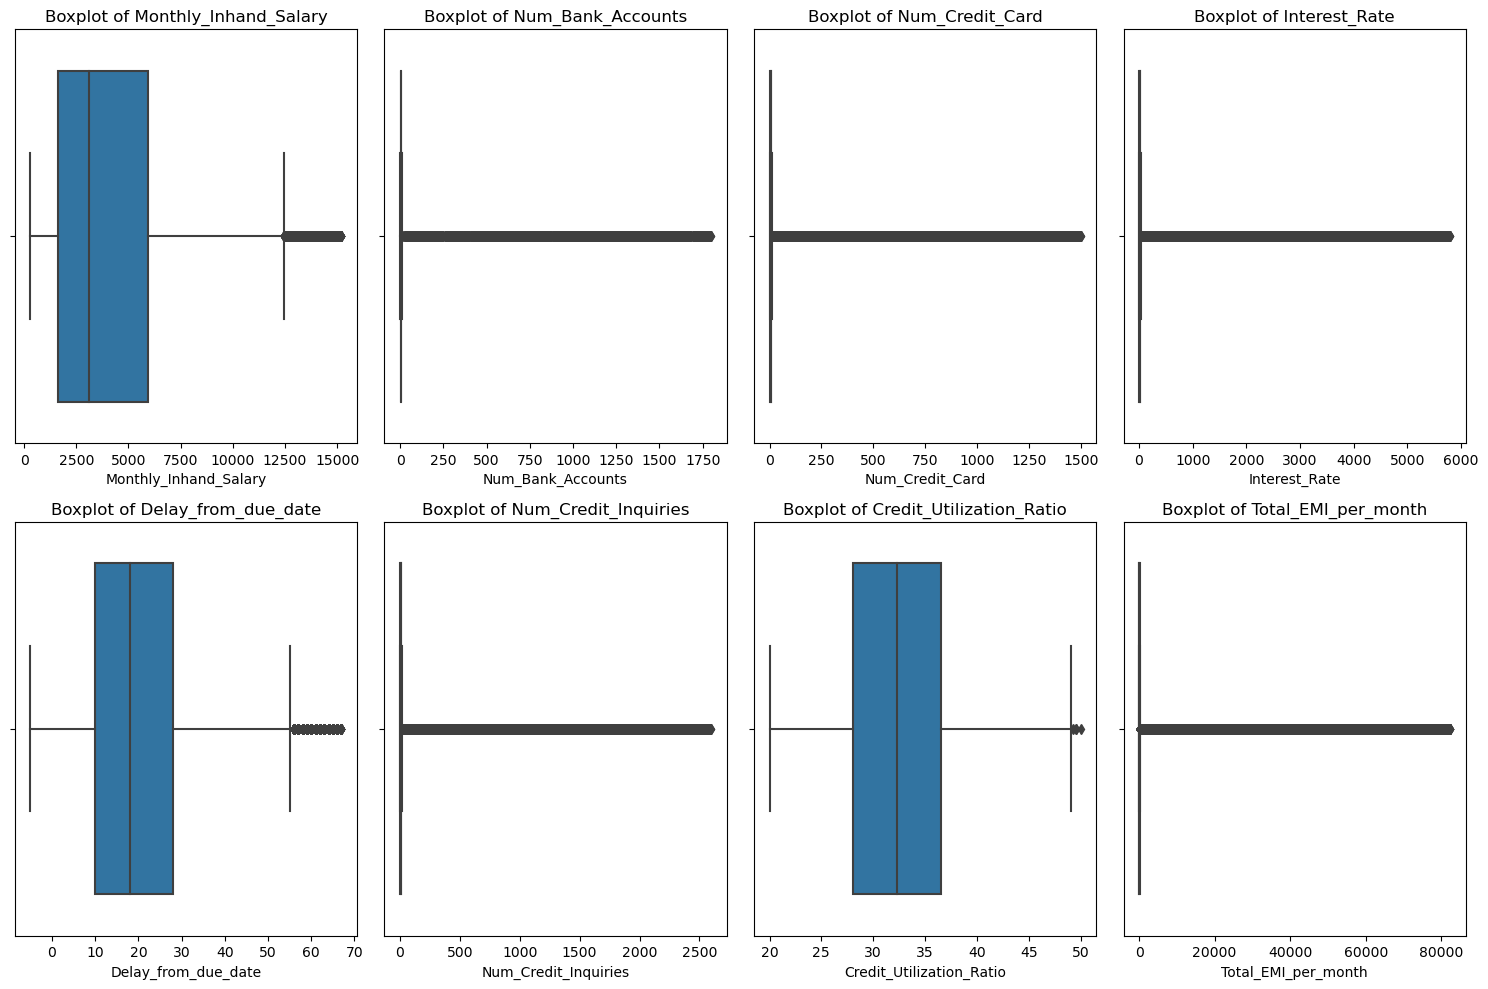

In [27]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of columns for the grid layout
num_cols = 4

# Calculate the number of rows needed
num_rows = (len(numerical_features) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature and create a boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Remove any unused subplots
for j in range(len(numerical_features), num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [28]:
columns_to_drop = ['ID', 'Customer_ID', 'SSN', 'Type_of_Loan',
                   'Credit_History_Age','Age','Month',
                   'Occupation', 'Name',
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Payment_Behaviour']

subset_data = data[columns_to_drop]

# Display the subset dataframe
subset_data.head(15)

,ID,Customer_ID,SSN,Type_of_Loan,Credit_History_Age,Age,Month,Occupation,Name,Changed_Credit_Limit,Num_Credit_Inquiries,Payment_Behaviour
0,0x1602,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 1 Months,23,January,Scientist,Aaron Maashoh,11.27,4.0,High_spent_Small_value_payments
1,0x1603,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,23,February,Scientist,Aaron Maashoh,11.27,4.0,Low_spent_Large_value_payments
2,0x1604,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 3 Months,-500,March,Scientist,Aaron Maashoh,_,4.0,Low_spent_Medium_value_payments
3,0x1605,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 4 Months,23,April,Scientist,Aaron Maashoh,6.27,4.0,Low_spent_Small_value_payments
4,0x1606,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 5 Months,23,May,Scientist,Aaron Maashoh,11.27,4.0,High_spent_Medium_value_payments
5,0x1607,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 6 Months,23,June,Scientist,Aaron Maashoh,9.27,4.0,!@9#%8
6,0x1608,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 7 Months,23,July,Scientist,Aaron Maashoh,11.27,4.0,Low_spent_Small_value_payments
7,0x1609,CUS_0xd40,#F%$D@*&8,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,23,August,Scientist,NaN,11.27,4.0,High_spent_Medium_value_payments
8,0x160e,CUS_0x21b1,004-07-5839,Credit-Builder Loan,26 Years and 7 Months,28_,January,_______,Rick Rothackerj,5.42,2.0,Low_spent_Small_value_payments
9,0x160f,CUS_0x21b1,004-07-5839,Credit-Builder Loan,26 Years and 8 Months,28,February,Teacher,Rick Rothackerj,7.42,2.0,High_spent_Large_value_payments


'Monthly_Balance' - aggregate!, can still use these 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary',
                   'Total_EMI_per_month', 'Amount_invested_monthly'

In [29]:
data_cleaned = data.drop(columns=columns_to_drop)

In [30]:
data_cleaned.head(10)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3,4,3,4,3,7,_,809.98,26.822620,No,49.574949,80.41529543900253,312.49408867943663,Good
1,19114.12,NaN,3,4,3,4,-1,NaN,Good,809.98,31.944960,No,49.574949,118.28022162236736,284.62916249607184,Good
2,19114.12,NaN,3,4,3,4,3,7,Good,809.98,28.609352,No,49.574949,81.699521264648,331.2098628537912,Good
3,19114.12,NaN,3,4,3,4,5,4,Good,809.98,31.377862,No,49.574949,199.4580743910713,223.45130972736786,Good
4,19114.12,1824.843333,3,4,3,4,6,NaN,Good,809.98,24.797347,No,49.574949,41.420153086217326,341.48923103222177,Good
5,19114.12,NaN,3,4,3,4,8,4,Good,809.98,27.262259,No,49.574949,62.430172331195294,340.4792117872438,Good
6,19114.12,1824.843333,3,4,3,4,3,8_,Good,809.98,22.537593,No,49.574949,178.3440674122349,244.5653167062043,Good
7,19114.12,1824.843333,3,4,3,4,3,6,Good,809.98,23.933795,No,49.574949,24.785216509052056,358.12416760938714,Standard
8,34847.84,3037.986667,2,4,6,1,3,4,Good,605.03,24.464031,No,18.816215,104.291825168246,470.69062692529184,Standard
9,34847.84,3037.986667,2,4,6,1,7,1,Good,605.03,38.550848,No,18.816215,40.39123782853101,484.5912142650067,Good


In [31]:
numeric_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                   'Num_Credit_Card', 'Interest_Rate',	'Num_of_Loan',
                   'Delay_from_due_date',	'Num_of_Delayed_Payment',
                   'Outstanding_Debt',	'Credit_Utilization_Ratio',
                   'Total_EMI_per_month',	'Amount_invested_monthly','Monthly_Balance']

# Define a regular expression pattern to match special characters
pattern = r'[^\d.]'

# Remove special characters from numeric columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].replace(pattern, '', regex=True)

# Convert columns back to numeric
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].astype(float)

data_cleaned.head(10)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,_,809.98,26.822620,No,49.574949,80.415295,312.494089,Good
1,19114.12,NaN,3.0,4.0,3.0,4.0,-1.0,NaN,Good,809.98,31.944960,No,49.574949,118.280222,284.629162,Good
2,19114.12,NaN,3.0,4.0,3.0,4.0,3.0,7.0,Good,809.98,28.609352,No,49.574949,81.699521,331.209863,Good
3,19114.12,NaN,3.0,4.0,3.0,4.0,5.0,4.0,Good,809.98,31.377862,No,49.574949,199.458074,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,NaN,Good,809.98,24.797347,No,49.574949,41.420153,341.489231,Good
5,19114.12,NaN,3.0,4.0,3.0,4.0,8.0,4.0,Good,809.98,27.262259,No,49.574949,62.430172,340.479212,Good
6,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.0,Good,809.98,22.537593,No,49.574949,178.344067,244.565317,Good
7,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.0,Good,809.98,23.933795,No,49.574949,24.785217,358.124168,Standard
8,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,Good,605.03,24.464031,No,18.816215,104.291825,470.690627,Standard
9,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,1.0,Good,605.03,38.550848,No,18.816215,40.391238,484.591214,Good


In [32]:

print(data_cleaned.dtypes)

Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                 object
dtype: object


In [33]:
data_cleaned.sample(10
                  )

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
9857,21302.970,1799.247500,8.0,3.0,15.0,3.0,14.0,18.0,Standard,481.28,27.795631,Yes,48.939246,46.122850,334.862654,Standard
74936,20621.720,1849.476667,7.0,8.0,30.0,2.0,15.0,20.0,Standard,2309.82,38.121729,Yes,29.602331,62.720472,352.624864,Poor
6454,42776.510,3278.709167,4.0,4.0,3.0,0.0,6.0,11.0,Good,152.77,34.399476,No,0.000000,36.011268,541.859648,Standard
67143,22815.000,2071.250000,3.0,4.0,17.0,3.0,11.0,9.0,_,182.75,30.781902,Yes,22898.000000,197.045468,258.546213,Poor
64003,60530.700,4962.225000,3.0,6.0,9.0,1.0,24.0,19.0,Standard,361.83,26.210677,NM,40.763173,75.932214,619.527114,Standard
67354,18282.340,1769.528333,5.0,10.0,34.0,6.0,11.0,18.0,Standard,1310.97,36.842147,Yes,85.696837,23.157973,308.098023,Poor
52647,17082.685,1695.557083,5.0,7.0,356.0,6.0,28.0,21.0,_,560.63,25.265019,Yes,80.692040,52.878545,295.985123,Standard
59556,50253.000,4356.750000,3.0,4.0,18.0,1.0,16.0,18.0,Standard,1017.21,35.613443,Yes,27.965428,134.712090,552.997482,Poor
46237,49125.570,4177.797500,7.0,8.0,32.0,7.0,22.0,15.0,Bad,2575.83,26.847799,Yes,168.286096,105.716949,393.776705,Standard
70109,29357.850,2665.487500,5.0,4.0,17.0,3.0,19.0,14.0,Standard,848.04,30.880139,Yes,45.650521,107.164237,363.733992,Standard


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


In [35]:
# Identify missing values
missing_values = data_cleaned.isnull().sum()
print("Missing values:\n", missing_values)

numerical_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
                     'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                     'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                     'Amount_invested_monthly', 'Monthly_Balance']

# Iterate through numerical columns
for column in numerical_columns:
    if data_cleaned[column].isnull().any():
        # Impute missing values with mean
        imputer_mean = SimpleImputer(strategy='mean')
        data_cleaned[column] = imputer_mean.fit_transform(data_cleaned[[column]])

# Impute missing values in Credit_Mix with mode
#imputer_mode = SimpleImputer(strategy='most_frequent')
#data_cleaned['Credit_Mix'] = imputer_mode.fit_transform(data_cleaned[['Credit_Mix']])

# Verify if there are any remaining missing values
missing_values_after_imputation = data_cleaned.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)


Missing values:
 Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Monthly_Balance              1200
Credit_Score                    0
dtype: int64
Missing values after imputation:
 Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Am

In [36]:
#one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['Credit_Mix', 'Payment_of_Min_Amount'], drop_first=True)


Feature Importances:
Outstanding_Debt: 0.14199489486087877
Interest_Rate: 0.09850720706770737
Delay_from_due_date: 0.07960822779916009
Monthly_Balance: 0.0703465839422302
Credit_Utilization_Ratio: 0.06954958674945858
Amount_invested_monthly: 0.06838305763682612
Annual_Income: 0.06289899271259007
Total_EMI_per_month: 0.06177206208424007
Monthly_Inhand_Salary: 0.0578037984383484
Num_of_Delayed_Payment: 0.05207770665497262
Num_Credit_Card: 0.051526123455521884
Num_Bank_Accounts: 0.041580063346066565
Credit_Mix_Standard: 0.035000883710840654
Num_of_Loan: 0.03264326255490671
Credit_Mix_Good: 0.03254145093462816
Payment_of_Min_Amount_No: 0.018743533944596987
Payment_of_Min_Amount_Yes: 0.01578161401916399
Credit_Mix__: 0.00924095008786287


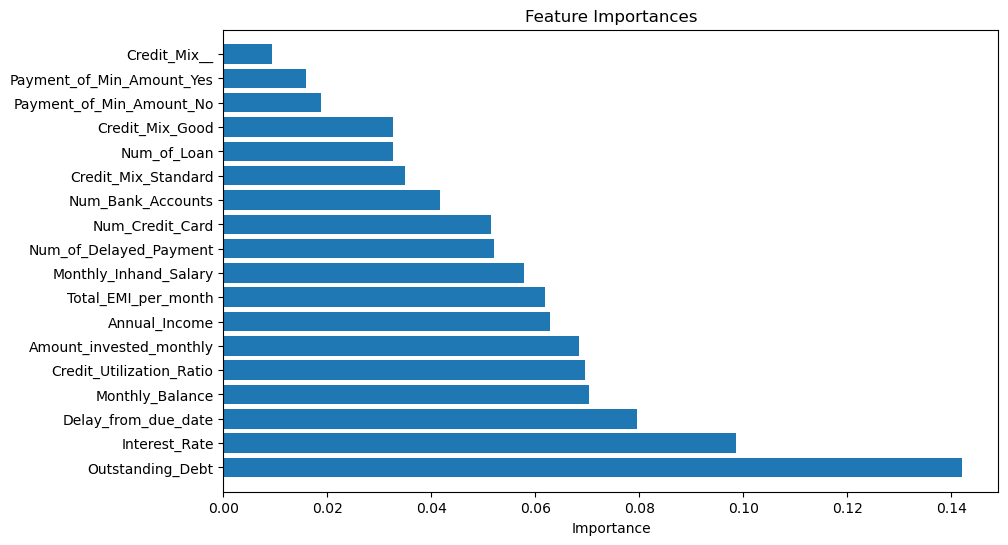

In [37]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming data_encoded is your DataFrame
X = data_encoded.drop(columns=['Credit_Score'])
y = data_encoded['Credit_Score']

# Train a Random Forest Classifier model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
importances = rf_classifier.feature_importances_
features = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for i in indices:
    print(f"{features[i]}: {importances[i]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], align="center")  # Change barh for horizontal bar plot
plt.yticks(range(X.shape[1]), [features[i] for i in indices])       # Use yticks for labels on y-axis
plt.ylim([-1, X.shape[1]])                                         # Adjust limits for y-axis
plt.xlabel("Importance")
plt.show()


In [38]:
# Dropping columns with lower importance scores
columns_to_drop = ['Credit_Mix_Good', 'Credit_Mix_Standard',
                   'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_No', 'Credit_Mix__']
data_cleaned_dropped = data_encoded.drop(columns=columns_to_drop)



In [39]:
data_cleaned_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  float64
 7   Num_of_Delayed_Payment    100000 non-null  float64
 8   Outstanding_Debt          100000 non-null  float64
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Total_EMI_per_month       100000 non-null  float64
 11  Amount_invested_monthly   100000 non-null  float64
 12  Monthly_Balance           100000 non-null  float64
 13  Credit_Score              100000 non-null  ob

In [40]:
data_cleaned_dropped.head(10)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.000000,809.98,26.822620,49.574949,80.415295,312.494089,Good
1,19114.12,4194.170850,3.0,4.0,3.0,4.0,-1.0,30.946268,809.98,31.944960,49.574949,118.280222,284.629162,Good
2,19114.12,4194.170850,3.0,4.0,3.0,4.0,3.0,7.000000,809.98,28.609352,49.574949,81.699521,331.209863,Good
3,19114.12,4194.170850,3.0,4.0,3.0,4.0,5.0,4.000000,809.98,31.377862,49.574949,199.458074,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,30.946268,809.98,24.797347,49.574949,41.420153,341.489231,Good
5,19114.12,4194.170850,3.0,4.0,3.0,4.0,8.0,4.000000,809.98,27.262259,49.574949,62.430172,340.479212,Good
6,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.000000,809.98,22.537593,49.574949,178.344067,244.565317,Good
7,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.000000,809.98,23.933795,49.574949,24.785217,358.124168,Standard
8,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.000000,605.03,24.464031,18.816215,104.291825,470.690627,Standard
9,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,1.000000,605.03,38.550848,18.816215,40.391238,484.591214,Good


In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data into features (X) and target variable (y)
X = data_cleaned_dropped.drop(columns=['Credit_Score'])
y = data_cleaned_dropped['Credit_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Method 1: Feature Importance
# Train a Random Forest Classifier to analyze feature importances
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values()
print("Feature Importances (Random Forest):")
print(feature_importances)


Feature Importances (Random Forest):
Num_of_Loan                 0.041755
Num_Bank_Accounts           0.053348
Num_Credit_Card             0.061784
Monthly_Inhand_Salary       0.062564
Num_of_Delayed_Payment      0.064773
Total_EMI_per_month         0.067192
Annual_Income               0.069681
Amount_invested_monthly     0.073445
Credit_Utilization_Ratio    0.074212
Monthly_Balance             0.077007
Delay_from_due_date         0.089614
Interest_Rate               0.117264
Outstanding_Debt            0.147361
dtype: float64


Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64


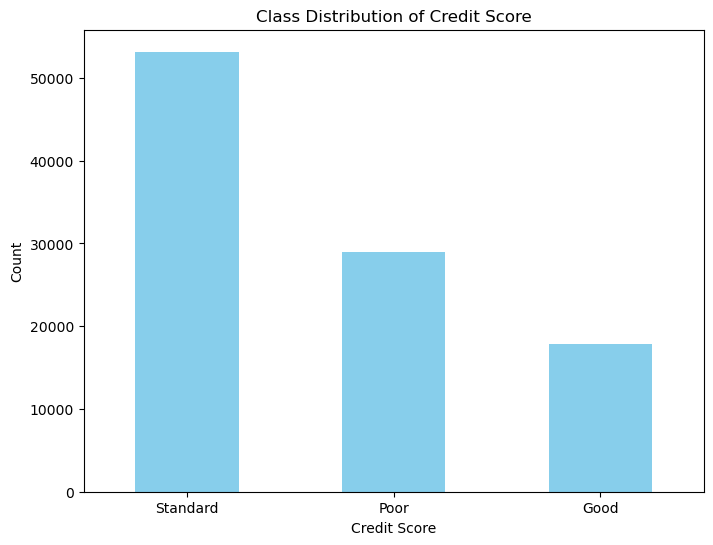

In [42]:
#checking fo class imbalance
import matplotlib.pyplot as plt

# Count the occurrences of each class in the target variable
class_counts = data_cleaned_dropped['Credit_Score'].value_counts()
print(class_counts)

# Plot a bar chart to visualize the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Split data into features (X) and target variable (y)
X = data_cleaned_dropped.drop(columns=['Credit_Score'])
y = data_cleaned_dropped['Credit_Score']

# Convert target labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize MinMaxScaler and StandardScaler
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Scale the training and testing features
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled= minmax_scaler.transform(X_test)

#X_train_scaled_standard = standard_scaler.fit_transform(X_train)
#X_test_scaled_standard = standard_scaler.transform(X_test)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(class_weight='balanced', n_estimators=200)

# Train Random Forest Classifier
rf_classifier.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate Random Forest Classifier
print("Random Forest Classifier:")
print("RF Accuracy:", accuracy_score(y_test_encoded, y_pred_rf))
print("RF Precision:", precision_score(y_test_encoded, y_pred_rf, average='weighted'))
print("RF Recall:", recall_score(y_test_encoded, y_pred_rf, average='weighted'))
print("RF F1 Score:", f1_score(y_test_encoded, y_pred_rf, average='weighted'))
print(classification_report(y_test_encoded, y_pred_rf))


Random Forest Classifier:
RF Accuracy: 0.77875
RF Precision: 0.778067799779976
RF Recall: 0.77875
RF F1 Score: 0.7776216048295026
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      3527
           1       0.79      0.79      0.79      5874
           2       0.78      0.82      0.80     10599

    accuracy                           0.78     20000
   macro avg       0.77      0.75      0.76     20000
weighted avg       0.78      0.78      0.78     20000



In [102]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Define base estimators for the stacking classifier
base_estimators = [
    ('rf', RandomForestClassifier(class_weight='balanced', n_estimators=100)),
    ('dt', DecisionTreeClassifier())
]

# Initialize stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_estimators, 
    final_estimator=LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warning
)

# Train stacking classifier
stacking_classifier.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_stacking = stacking_classifier.predict(X_test_scaled)

# Evaluate stacking classifier
print("Stacking Classifier1:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_stacking))
print(classification_report(y_test_encoded, y_pred_stacking))


Stacking Classifier1:
Accuracy: 0.77535
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      3527
           1       0.79      0.77      0.78      5874
           2       0.77      0.81      0.79     10599

    accuracy                           0.78     20000
   macro avg       0.77      0.75      0.76     20000
weighted avg       0.77      0.78      0.77     20000



In [103]:
from xgboost import XGBClassifier

# Define base estimators for the stacking classifier
base_estimators = [
    ('rf', RandomForestClassifier(class_weight='balanced', n_estimators=100)),
    ('dt', DecisionTreeClassifier()),
    ('xgb', XGBClassifier())
]

# Initialize stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_estimators, 
    final_estimator=LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warning
)

# Train stacking classifier
stacking_classifier.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_stacking = stacking_classifier.predict(X_test_scaled)

# Evaluate stacking classifier
print("Stacking Classifier2:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_stacking))
print(classification_report(y_test_encoded, y_pred_stacking))

Stacking Classifier2:
Accuracy: 0.77675
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      3527
           1       0.79      0.77      0.78      5874
           2       0.78      0.81      0.80     10599

    accuracy                           0.78     20000
   macro avg       0.77      0.75      0.76     20000
weighted avg       0.78      0.78      0.78     20000



In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from xgboost import XGBClassifier


In [94]:
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(class_weight='balanced')

# Train Decision Tree Classifier
dt_classifier.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Evaluate Decision Tree Classifier
print("Decision Tree Classifier:")
print("DT Accuracy:", accuracy_score(y_test_encoded, y_pred_dt))
print("DT Precision:", precision_score(y_test_encoded, y_pred_dt, average='weighted'))
print("DT Recall:", recall_score(y_test_encoded, y_pred_dt, average='weighted'))
print("DT F1 Score:", f1_score(y_test_encoded, y_pred_dt, average='weighted'))
print(classification_report(y_test_encoded, y_pred_dt))

Decision Tree Classifier:
DT Accuracy: 0.69865
DT Precision: 0.6981778005675496
DT Recall: 0.69865
DT F1 Score: 0.6982613313226304
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      3527
           1       0.71      0.68      0.70      5874
           2       0.72      0.74      0.73     10599

    accuracy                           0.70     20000
   macro avg       0.68      0.67      0.68     20000
weighted avg       0.70      0.70      0.70     20000



In [95]:
# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier()

# Train XGBoost Classifier
xgb_classifier.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Evaluate XGBoost Classifier
print("XGBoost Classifier:")
print("XGB Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("XGB Precision:", precision_score(y_test_encoded, y_pred_xgb, average='weighted'))
print("XGB Recall:", recall_score(y_test_encoded, y_pred_xgb, average='weighted'))
print("XGB F1 Score:", f1_score(y_test_encoded, y_pred_xgb, average='weighted'))
print(classification_report(y_test_encoded, y_pred_xgb))


XGBoost Classifier:
XGB Accuracy: 0.732
XGB Precision: 0.7305602662710615
XGB Recall: 0.732
XGB F1 Score: 0.7305723934312458
              precision    recall  f1-score   support

           0       0.67      0.60      0.63      3527
           1       0.74      0.72      0.73      5874
           2       0.74      0.78      0.76     10599

    accuracy                           0.73     20000
   macro avg       0.72      0.70      0.71     20000
weighted avg       0.73      0.73      0.73     20000



In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

In [53]:
from sklearn.metrics import classification_report
# Step 2: Handle Missing Values
# Simple imputation of missing values
imputer = SimpleImputer(strategy='mean')

# Step 3: Feature Scaling
scaler = StandardScaler()

# Step 4: Address Class Imbalance
# Apply RandomOverSampler to handle class imbalance
oversampler = RandomOverSampler()


# Step 5: Define Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Step 6: Create a pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('logistic_regression', logistic_regression)
])


# Step 8: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'logistic_regression__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'logistic_regression__penalty': ['l2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_encoded)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Step 9: Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test_encoded, y_pred))

Best parameters: {'logistic_regression__C': 10, 'logistic_regression__penalty': 'l2'}
Best cross-validation score: 0.56825
Test Accuracy: 0.56975
              precision    recall  f1-score   support

           0       0.52      0.13      0.20      3527
           1       0.58      0.37      0.46      5874
           2       0.57      0.83      0.67     10599

    accuracy                           0.57     20000
   macro avg       0.56      0.44      0.44     20000
weighted avg       0.56      0.57      0.53     20000



In [ ]:
#Tabasum's NN code can go here: 




